In [19]:
import sys 
sys.path.append('../fsp')
import marketDataAnalysis as mda
import timeSeriesModeling as tsm
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime, timedelta
from IPython.display import Math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy.optimize as optimize
from numpy import random


<AxesSubplot: >

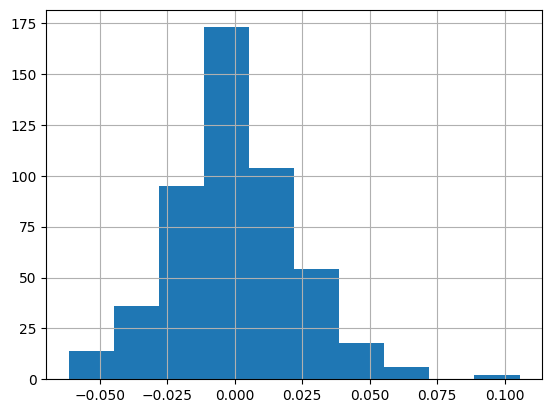

In [20]:
# I'm doing this on a plane, so I can't access the internet, so this stuff doesn't work, alas I am using some csvs I downloaded. 
# startdate= datetime(year=2017,month=12,day=29)
# enddate= datetime(year=2018,month=12,day=31)
# tech_ticks = ['NVDA', 'GOOGL', 'AMZN', 'META', 'MSFT']

# stocks = mda.get_stock_data(tech_ticks, startdate, enddate)
# stocks.head()


# read in stock data from csv
nvdia = pd.read_csv("../TSM.csv")
nvdia.drop(labels=["Open", "High", "Low", "Close","Volume"], axis=1, inplace=True)

nvdia["Adj Close Pct Change"] = nvdia["Adj Close"].pct_change()
nvdia["Adj Close Pct Change"] -= np.mean(nvdia["Adj Close Pct Change"])
nvdia.head()
nvdia["Adj Close Pct Change"].hist()

Text(0.5, 1.0, 'Daily Adj Close Pct Change Squared, zero mean')

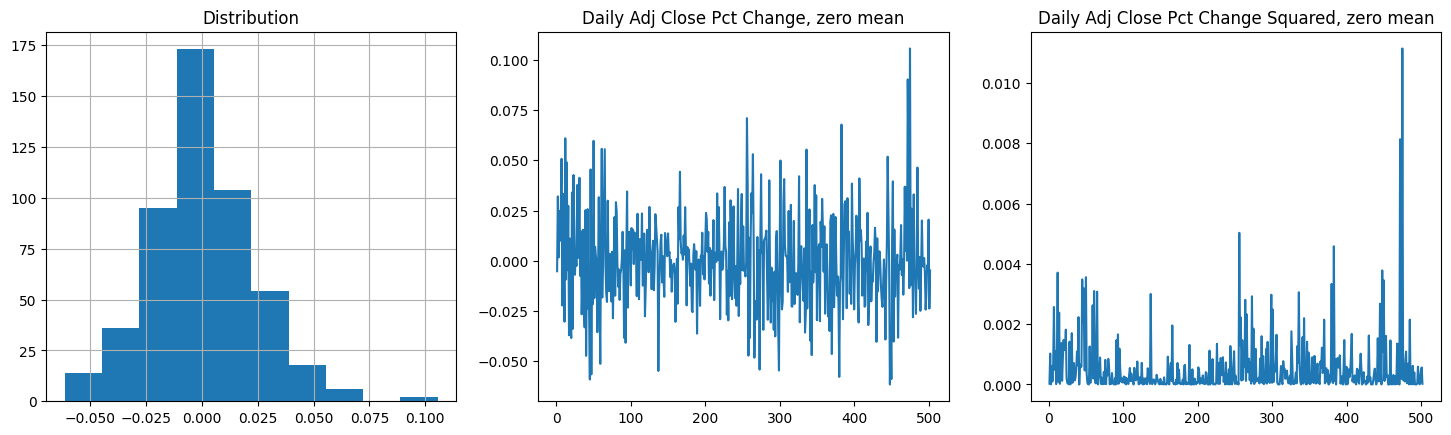

In [21]:
fig, axs = plt.subplots(1,3)
fig.set_figwidth(18)
nvdia["Adj Close Pct Change"].hist(ax=axs[0])
axs[0].set_title("Distribution")
axs[1].plot(nvdia["Adj Close Pct Change"])
axs[1].set_title("Daily Adj Close Pct Change, zero mean")
axs[2].plot(nvdia["Adj Close Pct Change"]**2)
axs[2].set_title("Daily Adj Close Pct Change Squared, zero mean")


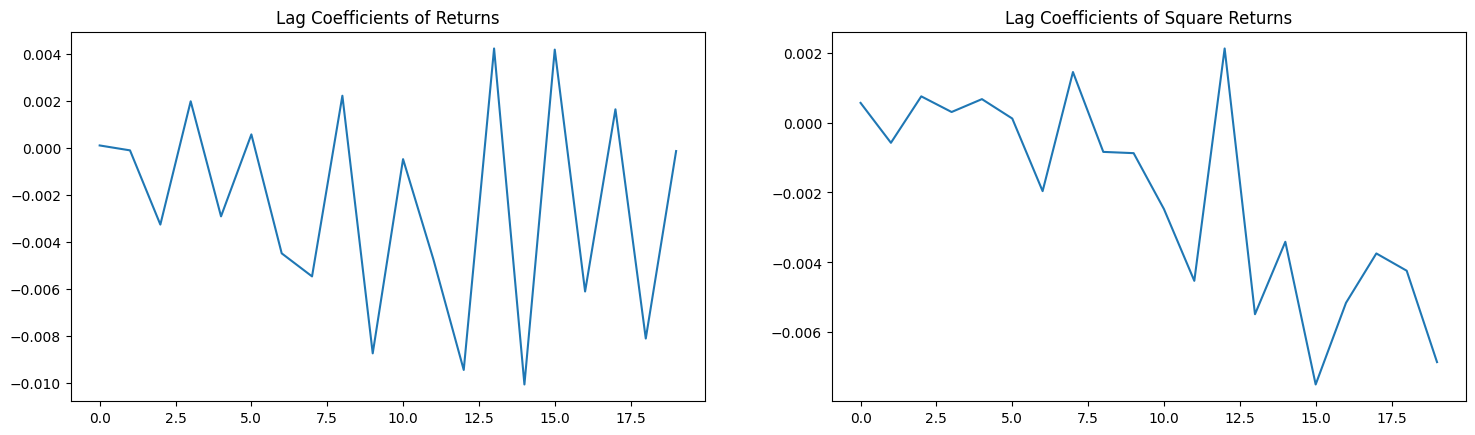

In [22]:
data = nvdia["Adj Close Pct Change"].to_list()
data.pop(0)
ndata = data
var = np.var(data)
acorr = np.correlate(ndata, ndata, 'full')
acorr = acorr / var / len(ndata)
acorr = acorr[0:20]

fig, axs = plt.subplots(1,2)

axs[0].plot(acorr)
axs[0].set_title("Lag Coefficients of Returns")
axs[1].set_title("Lag Coefficients of Square Returns")

data = np.square(data)
ndata = data - np.mean(data)
var = np.var(data)
acorr = np.correlate(ndata, ndata, 'full')
acorr = acorr / var / len(ndata)
acorr = acorr[0:20]
axs[1].plot(acorr)
fig.set_figwidth(18)

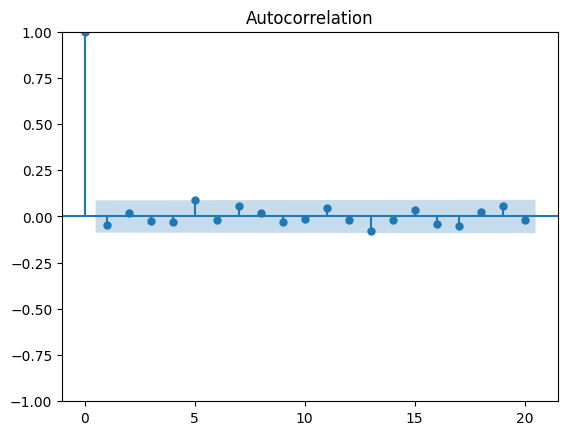

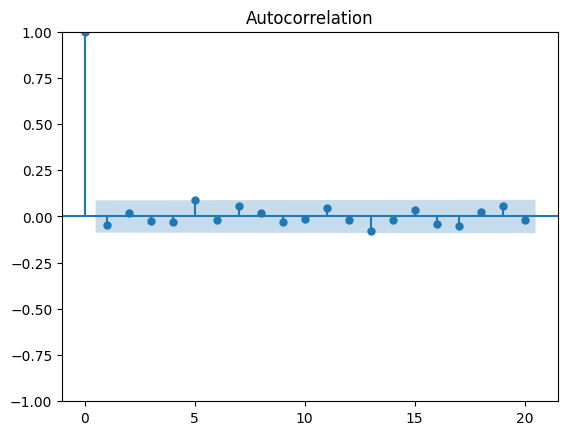

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
data = nvdia["Adj Close Pct Change"].to_list()
data.pop(0)
plot_acf(np.array(data), lags=20)

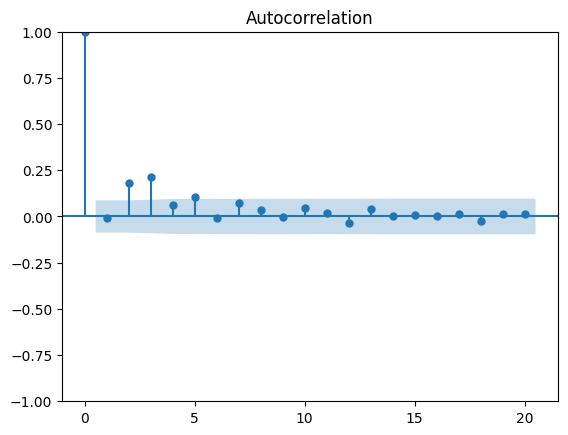

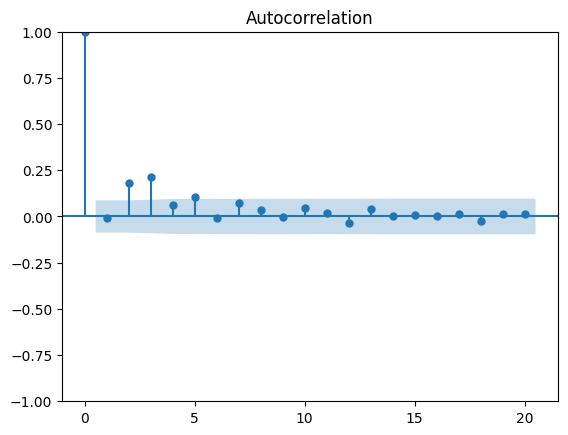

In [24]:
plot_acf(np.square(data), lags=20)


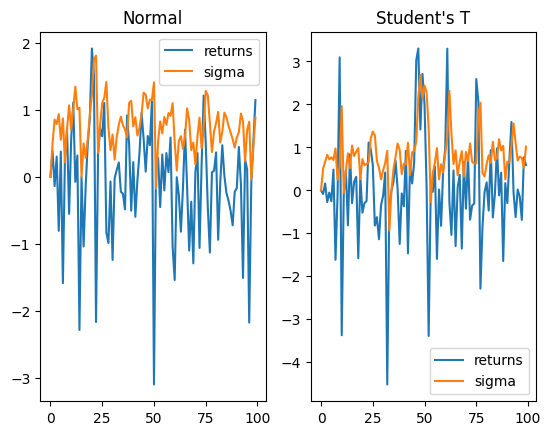

In [27]:
#1. Synthesize r_t:
w = 0.5
alpha = 0.4
beta = 0.4

def r_t(e_1t, sigma_1t):
    sigma = w + alpha * e_1t + beta * sigma_1t
    rt = sigma * np.random.standard_normal()
    return rt, sigma

rts = [0]
sigmas = [0]
nums = int(1e2)
rng = range(0,nums)

for i in range(1,nums):
    c = r_t(rts[-1], sigmas[-1])
    rts.append(c[0])
    sigmas.append(c[1])

def r_t_st(e_1t, sigma_1t):
    sigma = w + alpha * e_1t + beta * sigma_1t
    rt = sigma * np.random.standard_t(df=5)
    return rt, sigma

rts_st = [0]
sigmas_st = [0]
for i in rng:
    c = r_t_st(rts_st[-1], sigmas_st[-1])
    rts_st.append(c[0])
    sigmas_st.append(c[1])

fig, axs = plt.subplots(1,2)
axs[0].set_title("Normal")
axs[0].plot(rng, rts, label="returns")
axs[0].plot(rng, sigmas, label="sigma")
axs[0].legend()

def r_t_st(e_1t, sigma_1t):
    sigma = w + alpha * e_1t + beta * sigma_1t
    rt = sigma * np.random.standard_t(df=5)
    return rt, sigma

rts_st = [0]
sigmas_st = [0]
for i in range(1,nums):
    c = r_t_st(rts_st[-1], sigmas_st[-1])
    rts_st.append(c[0])
    sigmas_st.append(c[1])
axs[1].set_title("Student's T")
axs[1].plot(rng, rts_st, label="returns")
axs[1].plot(rng, sigmas_st, label="sigma")
axs[1].legend()
plt.show()

Normal Distributution: ARCH
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.94184080029481
            Iterations: 9
            Function evaluations: 50
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -121.942
Distribution:                  Normal   AIC:                           251.884
Method:            Maximum Likelihood   BIC:                           262.304
                                        No. Observations:                  100
Date:                Thu, Dec 29 2022   Df Residuals:                       99
Time:                        00:15:52   Df Model:                            1
                                Mean Model           

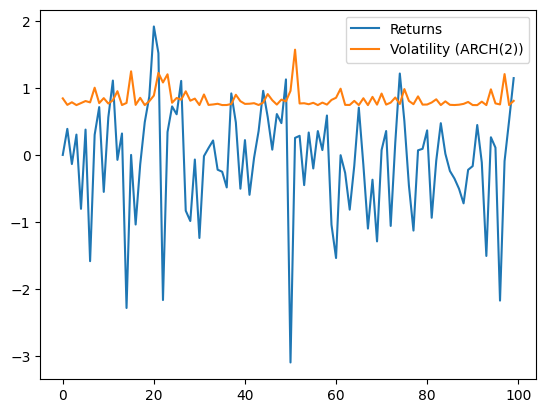

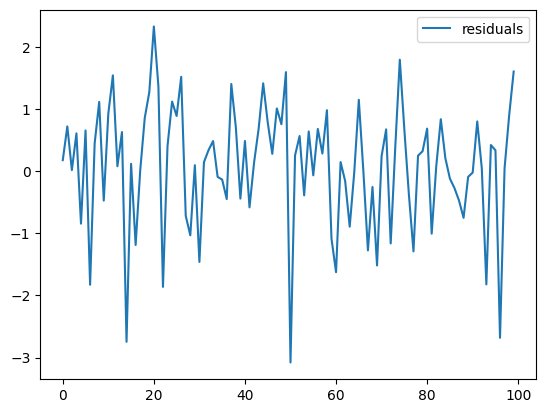

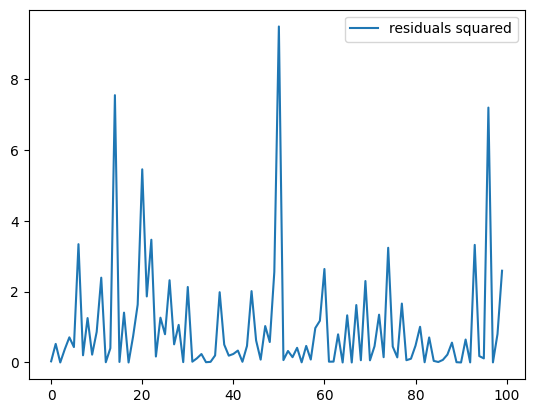


Normal Distributution: GARCH
Optimization terminated successfully    (Exit mode 0)
            Current function value: 121.94184078884182
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -121.942
Distribution:                  Normal   AIC:                           251.884
Method:            Maximum Likelihood   BIC:                           262.304
                                        No. Observations:                  100
Date:                Thu, Dec 29 2022   Df Residuals:                       99
Time:                        00:15:52   Df Model:                            1
                               Mean Model        

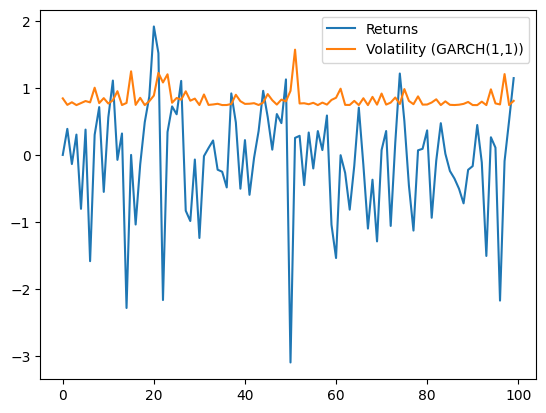

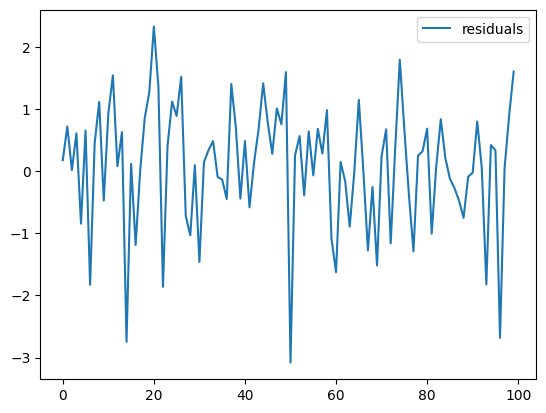

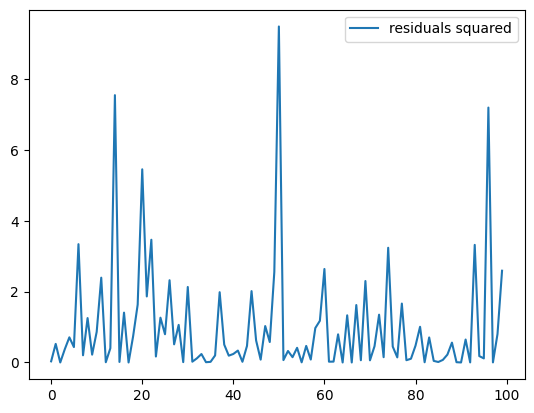


Normal Distributution: ARCH
Optimization terminated successfully    (Exit mode 0)
            Current function value: 162.19580829581525
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -162.196
Distribution:                  Normal   AIC:                           332.392
Method:            Maximum Likelihood   BIC:                           342.812
                                        No. Observations:                  100
Date:                Thu, Dec 29 2022   Df Residuals:                       99
Time:                        00:15:52   Df Model:                            1
                               Mean Model           

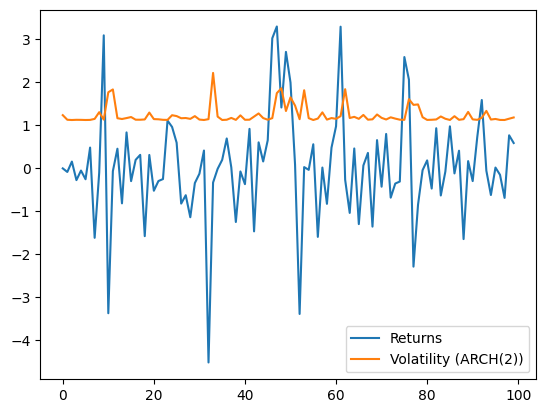

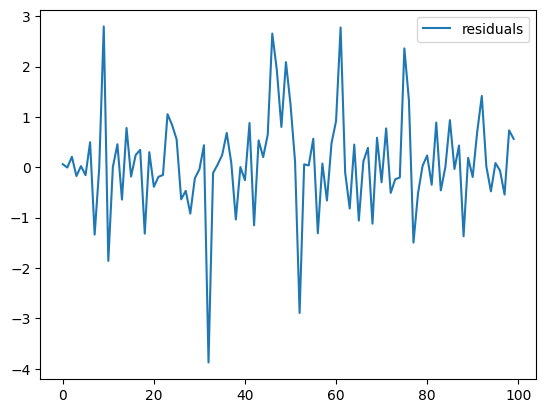

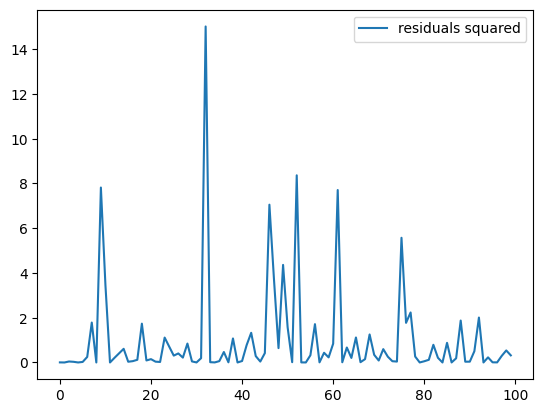


Normal Distributution: GARCH
Optimization terminated successfully    (Exit mode 0)
            Current function value: 162.1905517339823
            Iterations: 11
            Function evaluations: 61
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -162.191
Distribution:                  Normal   AIC:                           332.381
Method:            Maximum Likelihood   BIC:                           342.802
                                        No. Observations:                  100
Date:                Thu, Dec 29 2022   Df Residuals:                       99
Time:                        00:15:52   Df Model:                            1
                               Mean Model         

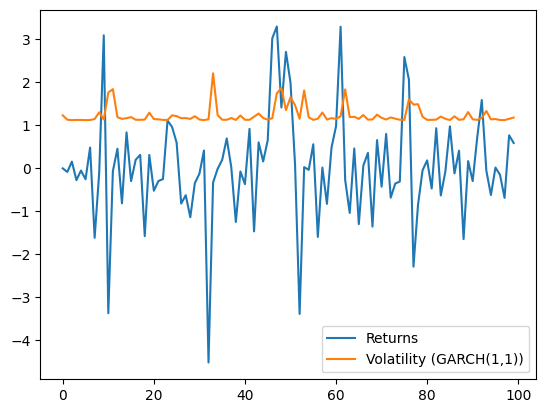

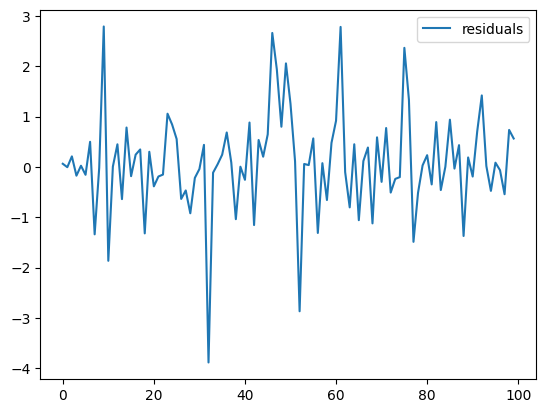

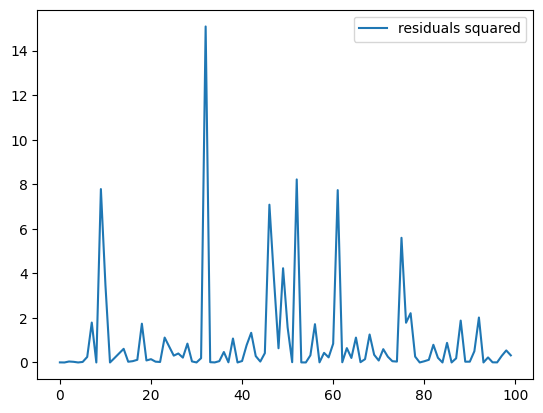

In [32]:
from arch import arch_model
for rt_s in [rts, rts_st]:

    print("Normal Distributution: ARCH")
    am = arch_model(rt_s, vol="ARCH",p=2 )
    res = am.fit(update_freq=0)
    print(res.summary())
    volatility = res.conditional_volatility
    # Plot the fitted volatility and the return data on the same graph
    plt.plot(rt_s, label='Returns')
    plt.plot(volatility, label='Volatility (ARCH(2))')
    plt.legend()

    std_resid = res.resid / res.conditional_volatility
    plt.show()
    plt.plot(std_resid, label="residuals")
    plt.legend()
    plt.show()
    plt.plot(std_resid**2, label="residuals squared")
    plt.legend()
    plt.show()

    print("")
    print("Normal Distributution: GARCH")
    am = arch_model(rt_s, p=1, q=1)
    res = am.fit(update_freq=0)
    print(res.summary())
    volatility = res.conditional_volatility
    # Plot the fitted volatility and the return data on the same graph
    plt.plot(rt_s, label='Returns')
    plt.plot(volatility, label='Volatility (GARCH(1,1))')
    plt.legend()
    std_resid = res.resid / res.conditional_volatility
    plt.show()
    plt.plot(std_resid, label="residuals")
    plt.legend()
    plt.show()
    plt.plot(std_resid**2, label="residuals squared")
    plt.legend()
    plt.show()    
    print("")

1. For the Normal Distributution:
- ARCH(2) - The numbers are in the right ball-park, but off by about 5-8, that is because the data was dated with GARCH.
- GARCH(1,1) - The model is better, but not by much. I'm not sure why?
2. For the Students T Distributution Data:

Normal Distributution: ARCH
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1193.7538633800534
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1193.75
Distribution:                  Normal   AIC:                          -2379.51
Method:            Maximum Likelihood   BIC:                          -2362.63
                                        No. Observations:                  502
Date:                Thu, Dec 29 2022   Df Residuals:                      501
Time:                        00:17:48   Df Model:                            1
                                  Mean Model      

/home/jacob/miniconda3/envs/fsp_toolkit.venv/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005328. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


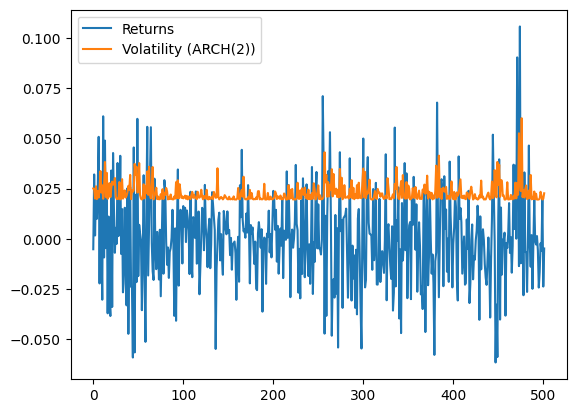

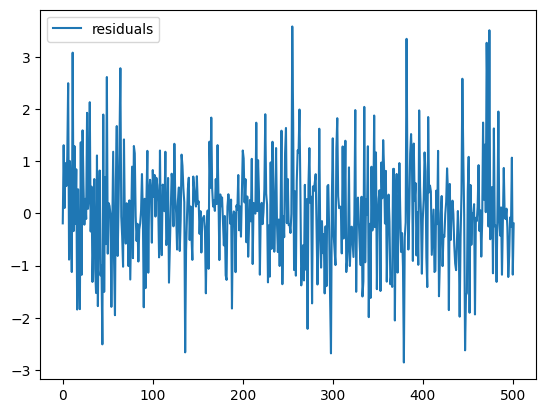

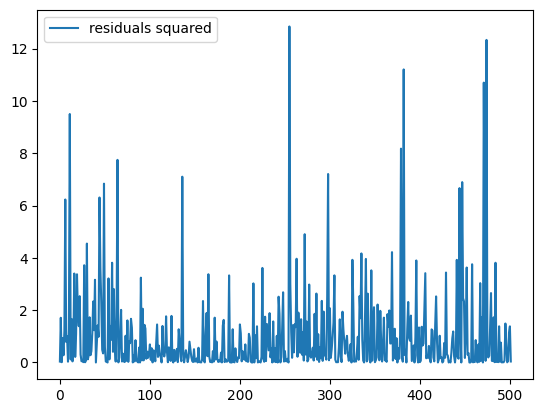


Normal Distributution: GARCH
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1194.0291738067435
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1194.03
Distribution:                  Normal   AIC:                          -2380.06
Method:            Maximum Likelihood   BIC:                          -2363.18
                                        No. Observations:                  502
Date:                Thu, Dec 29 2022   Df Residuals:                      501
Time:                        00:17:48   Df Model:                            1
                                  Mean Model      

/home/jacob/miniconda3/envs/fsp_toolkit.venv/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005328. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


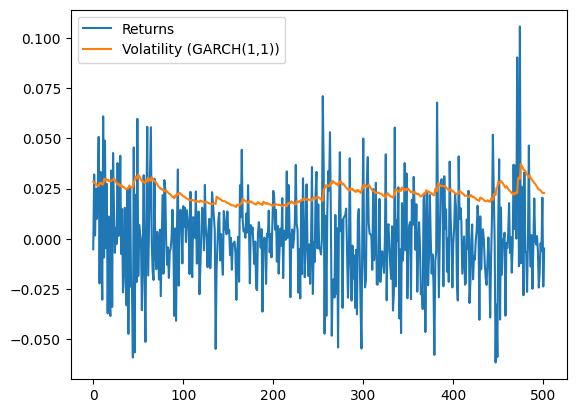

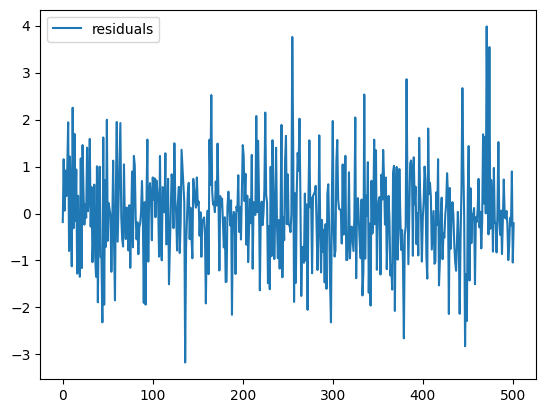

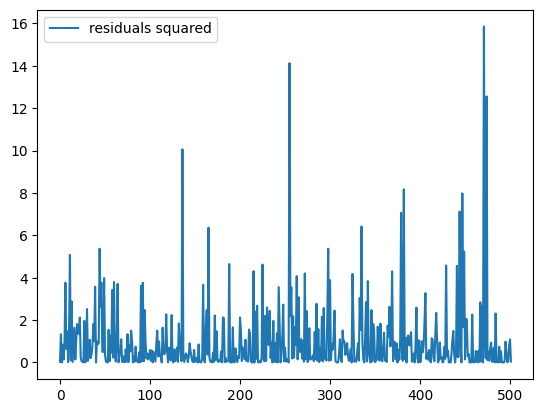

In [33]:
from arch import arch_model
for rt_s in [data]:

    print("Normal Distributution: ARCH")
    am = arch_model(rt_s, vol="ARCH",p=2 )
    res = am.fit(update_freq=0)
    print(res.summary())
    volatility = res.conditional_volatility
    # Plot the fitted volatility and the return data on the same graph
    plt.plot(rt_s, label='Returns')
    plt.plot(volatility, label='Volatility (ARCH(2))')
    plt.legend()

    std_resid = res.resid / res.conditional_volatility
    plt.show()
    plt.plot(std_resid, label="residuals")
    plt.legend()
    plt.show()
    plt.plot(std_resid**2, label="residuals squared")
    plt.legend()
    plt.show()

    print("")
    print("Normal Distributution: GARCH")
    am = arch_model(rt_s, p=1, q=1)
    res = am.fit(update_freq=0)
    print(res.summary())
    volatility = res.conditional_volatility
    # Plot the fitted volatility and the return data on the same graph
    plt.plot(rt_s, label='Returns')
    plt.plot(volatility, label='Volatility (GARCH(1,1))')
    plt.legend()
    std_resid = res.resid / res.conditional_volatility
    plt.show()
    plt.plot(std_resid, label="residuals")
    plt.legend()
    plt.show()
    plt.plot(std_resid**2, label="residuals squared")
    plt.legend()
    plt.show()    
    print("")